In [1]:
import os
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DATA_DIR = "data"

if not os.path.exists(DATA_DIR):
    os.makedirs(DATA_DIR)

URLS = {
    'KDDTrain+.txt':'https://raw.githubusercontent.com/defcom17/NSL_KDD/master/KDDTrain+.txt',
    'KDDTest+.txt' : 'https://raw.githubusercontent.com/defcom17/NSL_KDD/master/KDDTest+.txt'
}

def download_file(url, filename):
    local_path = os.path.join(DATA_DIR, filename)

    if os.path.exists(local_path):
        print(f"{filename} already exists ✅")
        return

    print(f"Downloading {filename}...")

    response = requests.get(url, stream=True)
    response.raise_for_status()

    with open(local_path, 'wb') as f:
        for chunk in response.iter_content(chunk_size=8000):
            f.write(chunk)

    print(f"Saved to {local_path} ✅")


for filename, url in URLS.items():
    download_file(url, filename)

print("All files downloaded!")

Saved to data/KDDTrain+.txt ✅
Saved to data/KDDTest+.txt ✅
All files downloaded!


In [3]:
COLUMNS = [
    "duration","protocol_type","service","flag","src_bytes","dst_bytes",
    "land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate",
    "dst_host_same_src_port_rate","dst_host_srv_diff_host_rate",
    "dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate",
    "class","difficulty"
]

train_path = os.path.join(DATA_DIR, "KDDTrain+.txt")
test_path  = os.path.join(DATA_DIR, "KDDTest+.txt")

train_df = pd.read_csv(train_path, names=COLUMNS)
test_df  = pd.read_csv(test_path, names=COLUMNS)

print("Data Loaded Successfully ✅")
train_df.head()

Data Loaded Successfully ✅


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,difficulty
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [4]:
print(train_df.shape)
print(train_df.info())
print(train_df.describe())

(125973, 43)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null 

In [5]:
print("Missing values:", train_df.isnull().sum().sum())
print("Duplicates:", train_df.duplicated().sum())

Missing values: 0
Duplicates: 0


In [6]:
train_df['class'].value_counts()

,count
class,
normal,67343
neptune,41214
satan,3633
ipsweep,3599
portsweep,2931
smurf,2646
nmap,1493
back,956
teardrop,892


In [7]:
train_df['protocol_type'].unique()
train_df['protocol_type'].value_counts()

,count
protocol_type,
tcp,102689
udp,14993
icmp,8291


In [8]:
tcp_data = train_df[train_df['protocol_type'] == 'tcp']
udp_data = train_df[train_df['protocol_type'] == 'udp']
icmp_data = train_df[train_df['protocol_type'] == 'icmp']

print("TCP:", len(tcp_data))
print("UDP:", len(udp_data))
print("ICMP:", len(icmp_data))

TCP: 102689
UDP: 14993
ICMP: 8291


In [9]:
land_attack = train_df[train_df['land'] == 1]
print("Land attacks:", len(land_attack))

Land attacks: 25


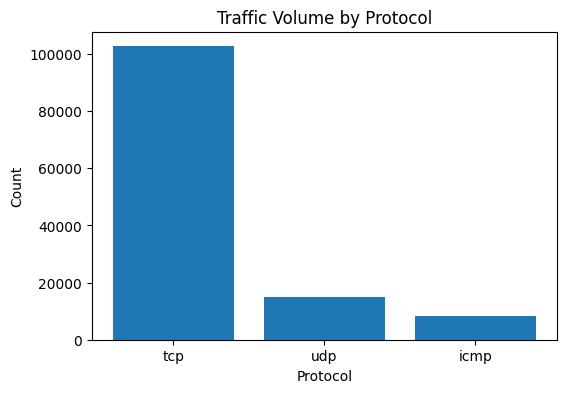

In [10]:
protocol_counts = train_df['protocol_type'].value_counts()

plt.figure(figsize=(6,4))
plt.bar(protocol_counts.index, protocol_counts.values)
plt.title("Traffic Volume by Protocol")
plt.xlabel("Protocol")
plt.ylabel("Count")
plt.show()

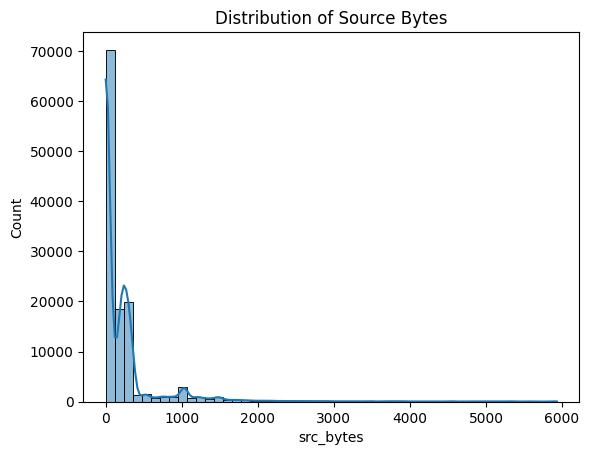

In [11]:
small_bytes = train_df[train_df['src_bytes'] < 6000]

sns.histplot(small_bytes['src_bytes'], bins=50, kde=True)
plt.title("Distribution of Source Bytes")
plt.show()

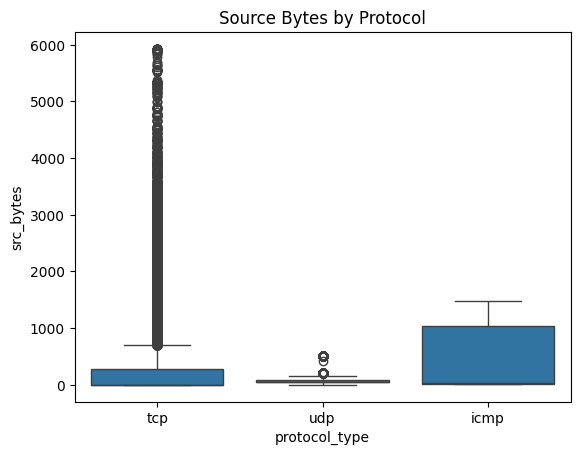

In [12]:
sns.boxplot(x='protocol_type', y='src_bytes', data=small_bytes)
plt.title("Source Bytes by Protocol")
plt.show()

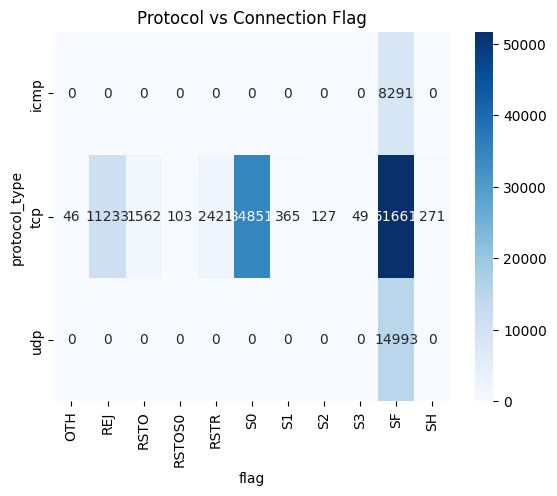

In [13]:
ct = pd.crosstab(train_df['protocol_type'], train_df['flag'])

sns.heatmap(ct, annot=True, fmt='d', cmap='Blues')
plt.title("Protocol vs Connection Flag")
plt.show()

In [14]:
print("Missing src_bytes:", train_df['src_bytes'].isna().sum())
print("Zero src_bytes:", (train_df['src_bytes']==0).sum())

pd.crosstab(train_df['protocol_type'], train_df['src_bytes']==0)

Missing src_bytes: 0
Zero src_bytes: 49392


src_bytes,False,True
protocol_type,,
icmp,8291,0
tcp,53297,49392
udp,14993,0


In [15]:
train_df['src_bytes_log'] = np.log1p(train_df['src_bytes'])
train_df['dst_bytes_log'] = np.log1p(train_df['dst_bytes'])

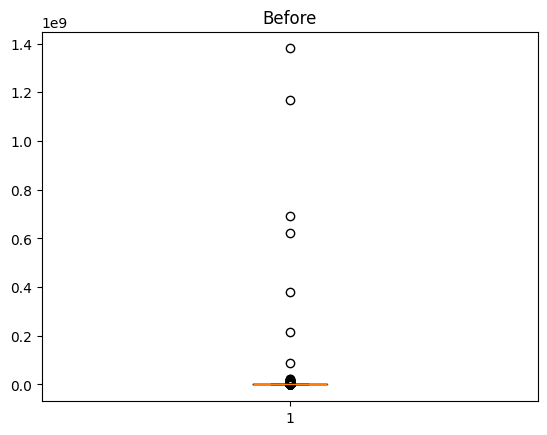

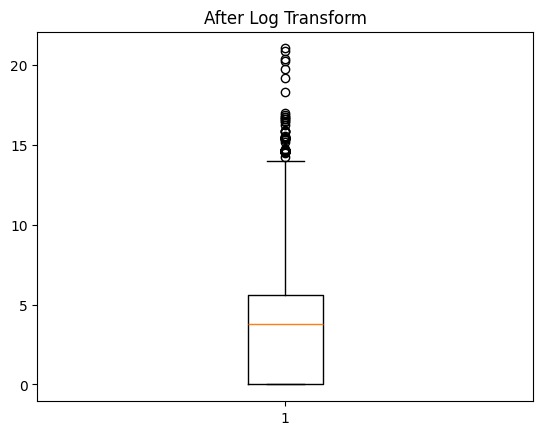

In [16]:
plt.boxplot(train_df['src_bytes'])
plt.title("Before")
plt.show()

plt.boxplot(train_df['src_bytes_log'])
plt.title("After Log Transform")
plt.show()

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

train_df[['src_bytes_log','dst_bytes_log']] = scaler.fit_transform(
    train_df[['src_bytes_log','dst_bytes_log']]
)

train_df[['src_bytes_log','dst_bytes_log']].head()

,src_bytes_log,dst_bytes_log
0,0.995517,-0.869111
1,0.590429,-0.869111
2,-1.082990,-0.869111
3,0.744881,1.668642
4,0.693670,0.833560


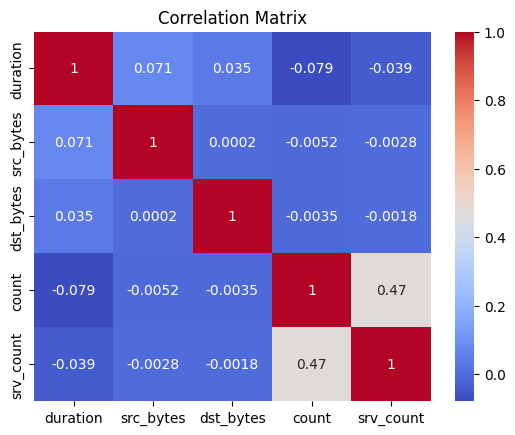

In [18]:
numerical_cols = ['duration','src_bytes','dst_bytes','count','srv_count']

corr = train_df[numerical_cols].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

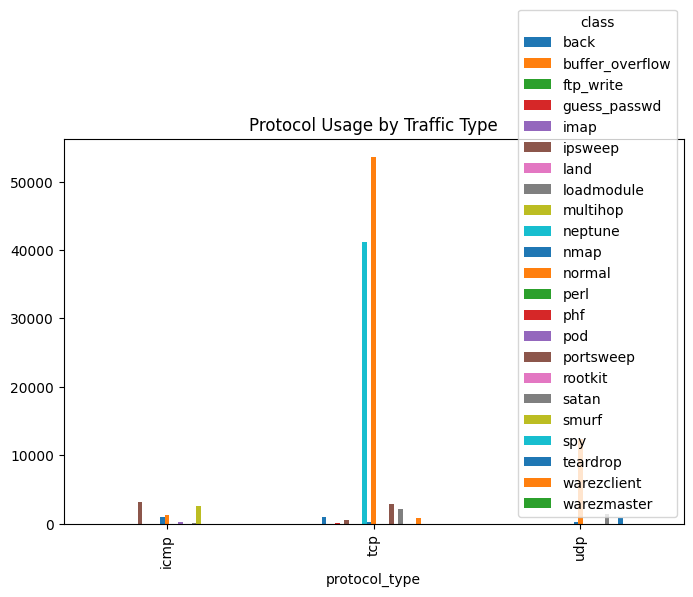

In [19]:
protocol_class = pd.crosstab(train_df['protocol_type'], train_df['class'])

protocol_class.plot(kind='bar', figsize=(8,5))
plt.title("Protocol Usage by Traffic Type")
plt.show()

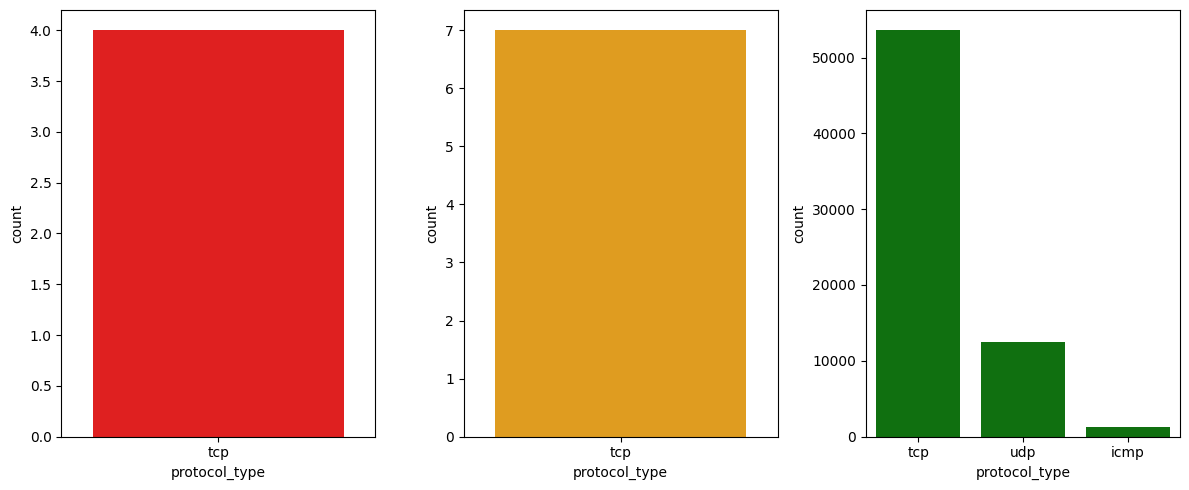

In [20]:
fig, axes = plt.subplots(1,3, figsize=(12,5))

sns.countplot(x='protocol_type', data=train_df[train_df['class']=='phf'],
              ax=axes[0], color='red')

sns.countplot(x='protocol_type', data=train_df[train_df['class']=='multihop'],
              ax=axes[1], color='orange')

sns.countplot(x='protocol_type', data=train_df[train_df['class']=='normal'],
              ax=axes[2], color='green')

plt.tight_layout()
plt.show()

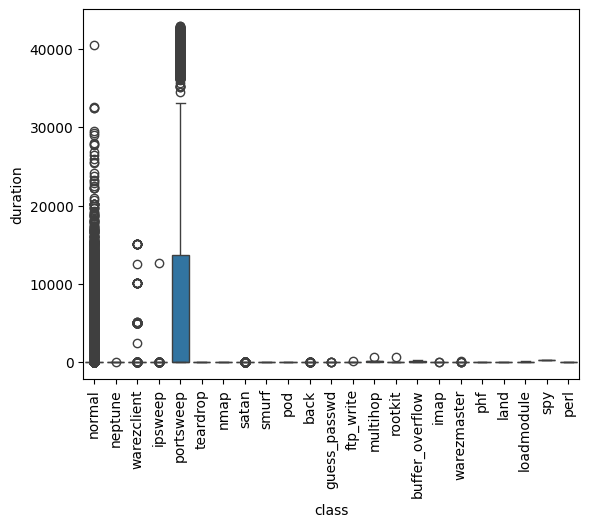

In [21]:
sns.boxplot(x='class', y='duration', data=train_df)
plt.xticks(rotation=90)
plt.show()

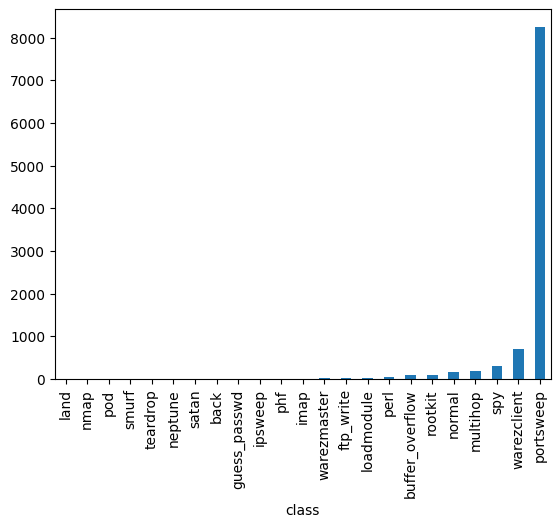

In [22]:
avg_duration = train_df.groupby('class')['duration'].mean().sort_values()
avg_duration.plot(kind='bar')
plt.show()

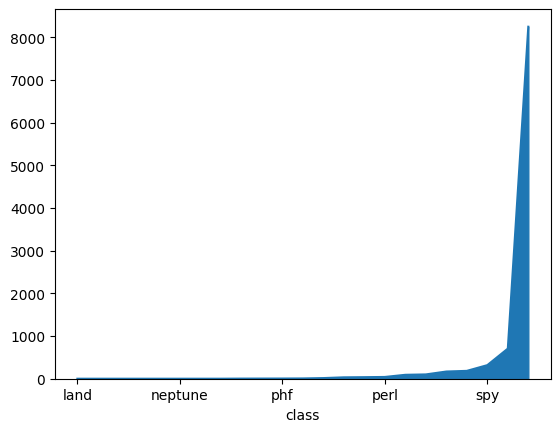

In [23]:
avg_distribution = train_df.groupby('class')['duration'].mean().sort_values()
avg_distribution

avg_distribution.plot(kind = 'area')
plt.show()

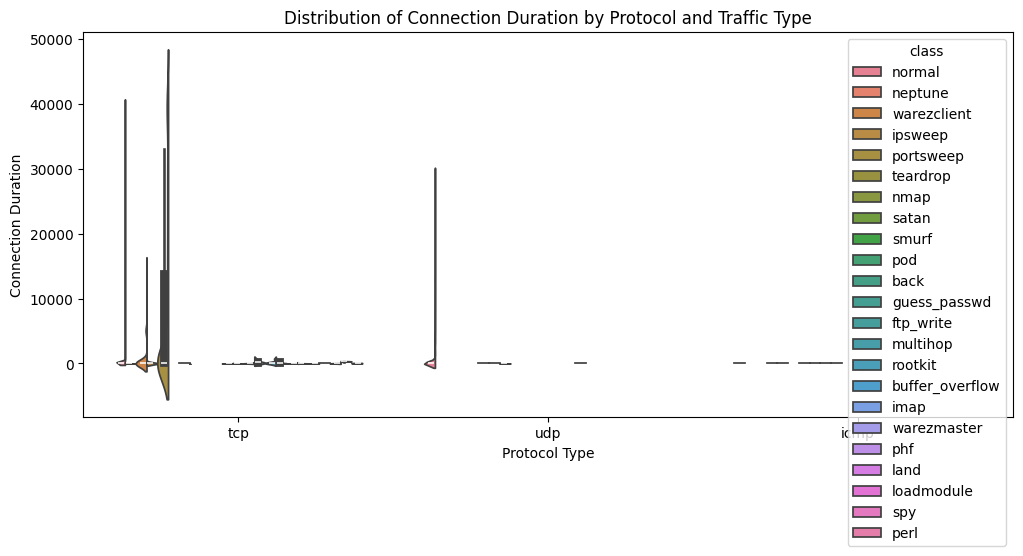

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))

sns.violinplot(
    x='protocol_type',
    y='duration',
    hue='class',
    data=train_df,
    split=True
)

plt.title("Distribution of Connection Duration by Protocol and Traffic Type")
plt.xlabel("Protocol Type")
plt.ylabel("Connection Duration")

plt.show()

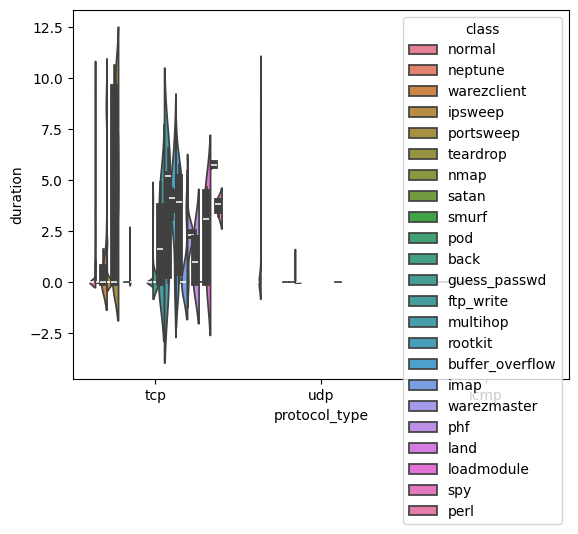

In [25]:
sns.violinplot(
    x='protocol_type',
    y=np.log1p(train_df['duration']),
    hue='class',
    data=train_df,
    split=True
)
plt.show()

In [26]:
new_df = train_df[
    ['duration','src_bytes','dst_bytes','count','srv_count','src_bytes_log']
]

new_df.to_csv("new_dataset.csv", index=False)

print(new_df.head())

   duration  src_bytes  dst_bytes  count  srv_count  src_bytes_log
0         0        491          0      2          2       0.995517
1         0        146          0     13          1       0.590429
2         0          0          0    123          6      -1.082990
3         0        232       8153      5          5       0.744881
4         0        199        420     30         32       0.693670


In [28]:
import os

os.listdir()

['.config', 'data', 'new_dataset.csv', 'sample_data']